# <p style="background-color:#034235;font-family:newtimeroman;color:#ffe7a0;font-size:150%;text-align:center;border-radius:20px 20px;">Application of Machine Learning Models to predict Company Bankruptcy</p>
___

Dữ liệu được thu thập từ ***Taiwan Economic Journal*** trong các năm 1999 đến 2009. Công ty phá sản được xác định dựa trên các quy định kinh doanh của Sở giao dịch chứng khoán Đài Loan (Taiwan Stock Exchange).

**DataSet Link:** https://www.kaggle.com/fedesoriano/company-bankruptcy-prediction

<a class="anchor" id="0.1"></a>
## <p style="background-color:#034235;font-family:newtimeroman;color:#ffe7a0;font-size:150%;text-align:center;border-radius:20px 20px;">Nội dung</p>

+ [**1. Load data**](#1)
    + [1.1 Import the libraries](#1.1)
    + [1.2 Load the dataset](#1.2)
+ [**2. Exploratory Data Analysis**](#2)
    + [2.1 Understanding dataset](#2.1)
    + [2.2 Data Cleaning](#2.2)
+ [**3. EDA and Visualization**](#3)
    + [3.1 Feature Selection](#3.1)
    + [3.2 Data Visualization](#3.2)
    + [3.3 Imbalanced Data](#3.3)
    + [3.4 Splitting and training](#3.4)
+ [**4. Model building**](#4)
    + [4.1 Logisitc Regression](#4.1)
    + [4.2 Naive Bayes](#4.2)
    + [4.3 KNN](#4.3)
    + [4.4 Decision Tree](#4.4)
    + [4.5 Random Forest](#4.5)
    + [4.6 SVM](#4.6)
    + [4.7 XG Boost](#4.7)
    + [4.8 CatBoost](#4.8)
    + [4.9 ANN](#4.9)
+ [**5. Result**](#5)

+ [**6. Conclusions**](#6)


# 1. Load data <a class="anchor" id="1"></a>
[**Nội dung**](#0.1)

### 1.1 Import the libraries <a class="anchor" id="1.1"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Load the dataset <a class="anchor" id="1.2"></a>

In [2]:
data = pd.read_csv("data.csv")
data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [3]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
data.tail()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009
6818,0,0.493053,0.570105,0.549548,0.627409,0.627409,0.998080,0.801987,0.813800,0.313415,...,0.815956,0.000707,0.626680,0.627408,0.841019,0.275114,0.026793,0.565167,1,0.233902


# 2. Exploratory Data Analysis <a class="anchor" id="2"></a>
[**Nội dung**](#0.1)

## 2.1 Understanding dataset <a class="anchor" id="2.1"></a>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

**Nhận xét:** 
+ Kết quả trên cho ta biết về thông tin cơ bản của các thành phần trong dataset. 
+ Ngoài ra, tên cột target thừa kí hiệu `?`, do đó cần loại bỏ kí hiệu này cho tên cột phù hợp.

In [6]:
data.rename(columns = {'Bankrupt?':'Bankrupt'}, inplace = True)
data.head()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


**Nhận xét:** Như vậy, tên target đã được đổi lại cho phù hợp.

In [7]:
data.shape

(6819, 96)

**Nhận xét:** Dataset có **6819** dòng và **96** cột (bao gồm cả cột target là Bankrupt?)

In [8]:
data.isnull().sum()

Bankrupt                                                    0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

**Nhận xét:** Không có cột nào có chứa giá trị null.

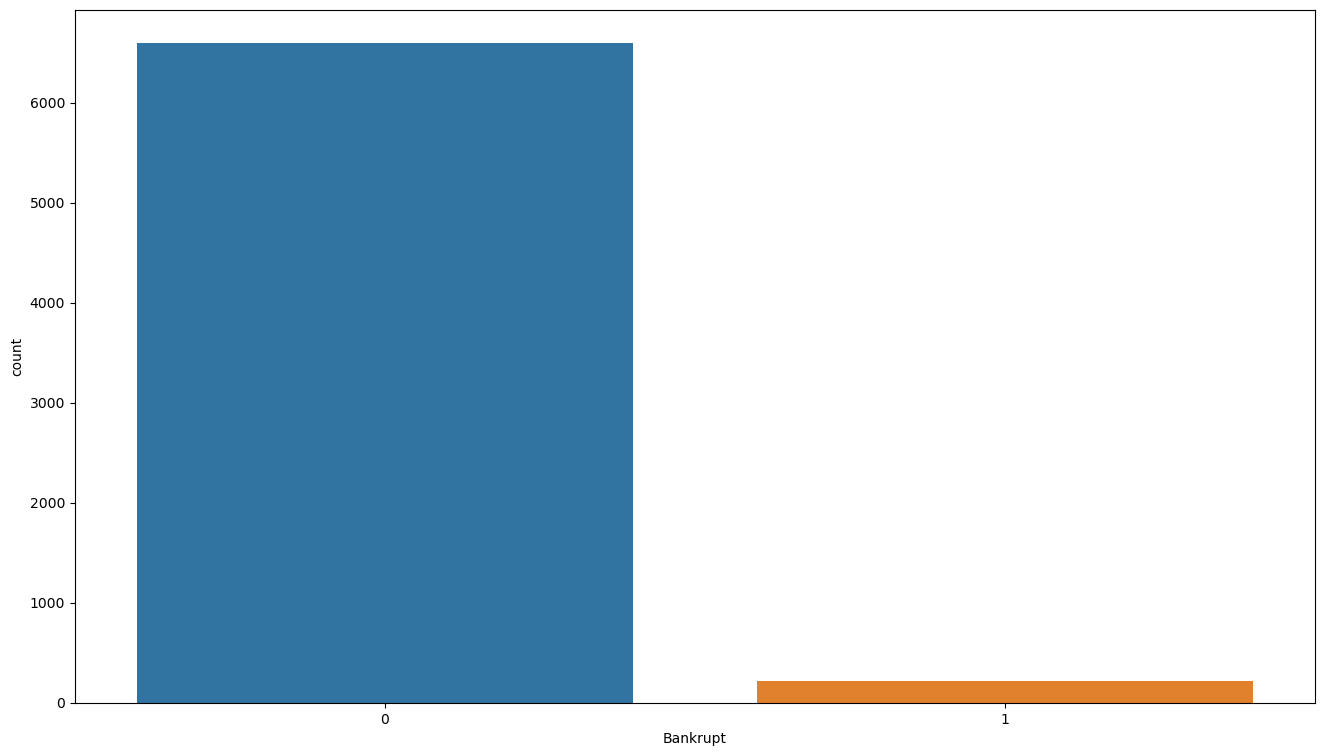

0    6599
1     220
Name: Bankrupt, dtype: int64


In [9]:
plt.figure(figsize=(16,9))
sns.countplot(x = 'Bankrupt', data = data)
plt.show()
print(data['Bankrupt'].value_counts())

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Bankrupt,6819.0,0.032263,0.176710,0.0,0.000000,0.000000,0.000000,1.0
ROA(C) before interest and depreciation before interest,6819.0,0.505180,0.060686,0.0,0.476527,0.502706,0.535563,1.0
ROA(A) before interest and % after tax,6819.0,0.558625,0.065620,0.0,0.535543,0.559802,0.589157,1.0
ROA(B) before interest and depreciation after tax,6819.0,0.553589,0.061595,0.0,0.527277,0.552278,0.584105,1.0
Operating Gross Margin,6819.0,0.607948,0.016934,0.0,0.600445,0.605997,0.613914,1.0
...,...,...,...,...,...,...,...,...
Liability to Equity,6819.0,0.280365,0.014463,0.0,0.276944,0.278778,0.281449,1.0
Degree of Financial Leverage (DFL),6819.0,0.027541,0.015668,0.0,0.026791,0.026808,0.026913,1.0
Interest Coverage Ratio (Interest expense to EBIT),6819.0,0.565358,0.013214,0.0,0.565158,0.565252,0.565725,1.0
Net Income Flag,6819.0,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.0


**Nhận xét tổng quan về dataset:**
+ Dataset gồm có 6819 dòng và 96 cột.
+ Không có giá trị null trong dữ liệu.
+ Bankrupt: không phá sản (0 = 6599) và phá sản (1 = 220).
+ Data Bankrupt là dạng **Imbalanced**.

## 2.2 Data Cleaning <a class="anchor" id="2.2"></a>

In [11]:
# Check if there are any duplicate rows
# data.duplicated(keep=False).sum()

In [12]:
# Xử lý dữ liệu ngoại lệ


In [13]:
# Xem dữ liệu bị thiếu
# data.isnull().values.sum() # check missing values

# 3. EDA and Visualization <a class="anchor" id="3"></a>
[**Nội dung**](#0.1)

## 3.1 Feature Selection <a class="anchor" id="3.1"></a>

In [14]:
from sklearn.model_selection import train_test_split

# to obtain the mutual information values
from sklearn.feature_selection import mutual_info_classif
# to select the features
from sklearn.feature_selection import SelectKBest

In [15]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['Bankrupt'], axis=1),
    data['Bankrupt'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((4773, 95), (2046, 95))

### Determine Mutual Information

In [16]:
# calculate the mutual information between the variables and the target

# the smaller the value of the mi, the less information we can infer from
# the feature about the target

mi = mutual_info_classif(X_train, y_train)
mi

array([0.02936778, 0.03418159, 0.03042146, 0.01676264, 0.01689314,
       0.02056909, 0.03025972, 0.02837835, 0.03186955, 0.03584854,
       0.00222862, 0.        , 0.01287366, 0.        , 0.02307004,
       0.03090304, 0.03041772, 0.02898226, 0.04291787, 0.00582691,
       0.00295734, 0.02150458, 0.04379009, 0.0088161 , 0.00677336,
       0.01205161, 0.00941468, 0.01111752, 0.01251884, 0.        ,
       0.01246841, 0.        , 0.02809615, 0.02655261, 0.03472754,
       0.03139274, 0.03550199, 0.0350467 , 0.0106669 , 0.03945658,
       0.00501315, 0.02474622, 0.04328728, 0.0051057 , 0.00885414,
       0.        , 0.        , 0.00084945, 0.        , 0.        ,
       0.        , 0.02360552, 0.00950347, 0.02650192, 0.00576042,
       0.00071265, 0.01679241, 0.02558708, 0.01473607, 0.01610328,
       0.01731491, 0.0229493 , 0.00408919, 0.00272687, 0.02232087,
       0.02399633, 0.0027846 , 0.03457833, 0.03417276, 0.00907948,
       0.00044713, 0.00335077, 0.0192358 , 0.00104572, 0.00394

### Feature Importance

Text(0, 0.5, 'Mutual Information')

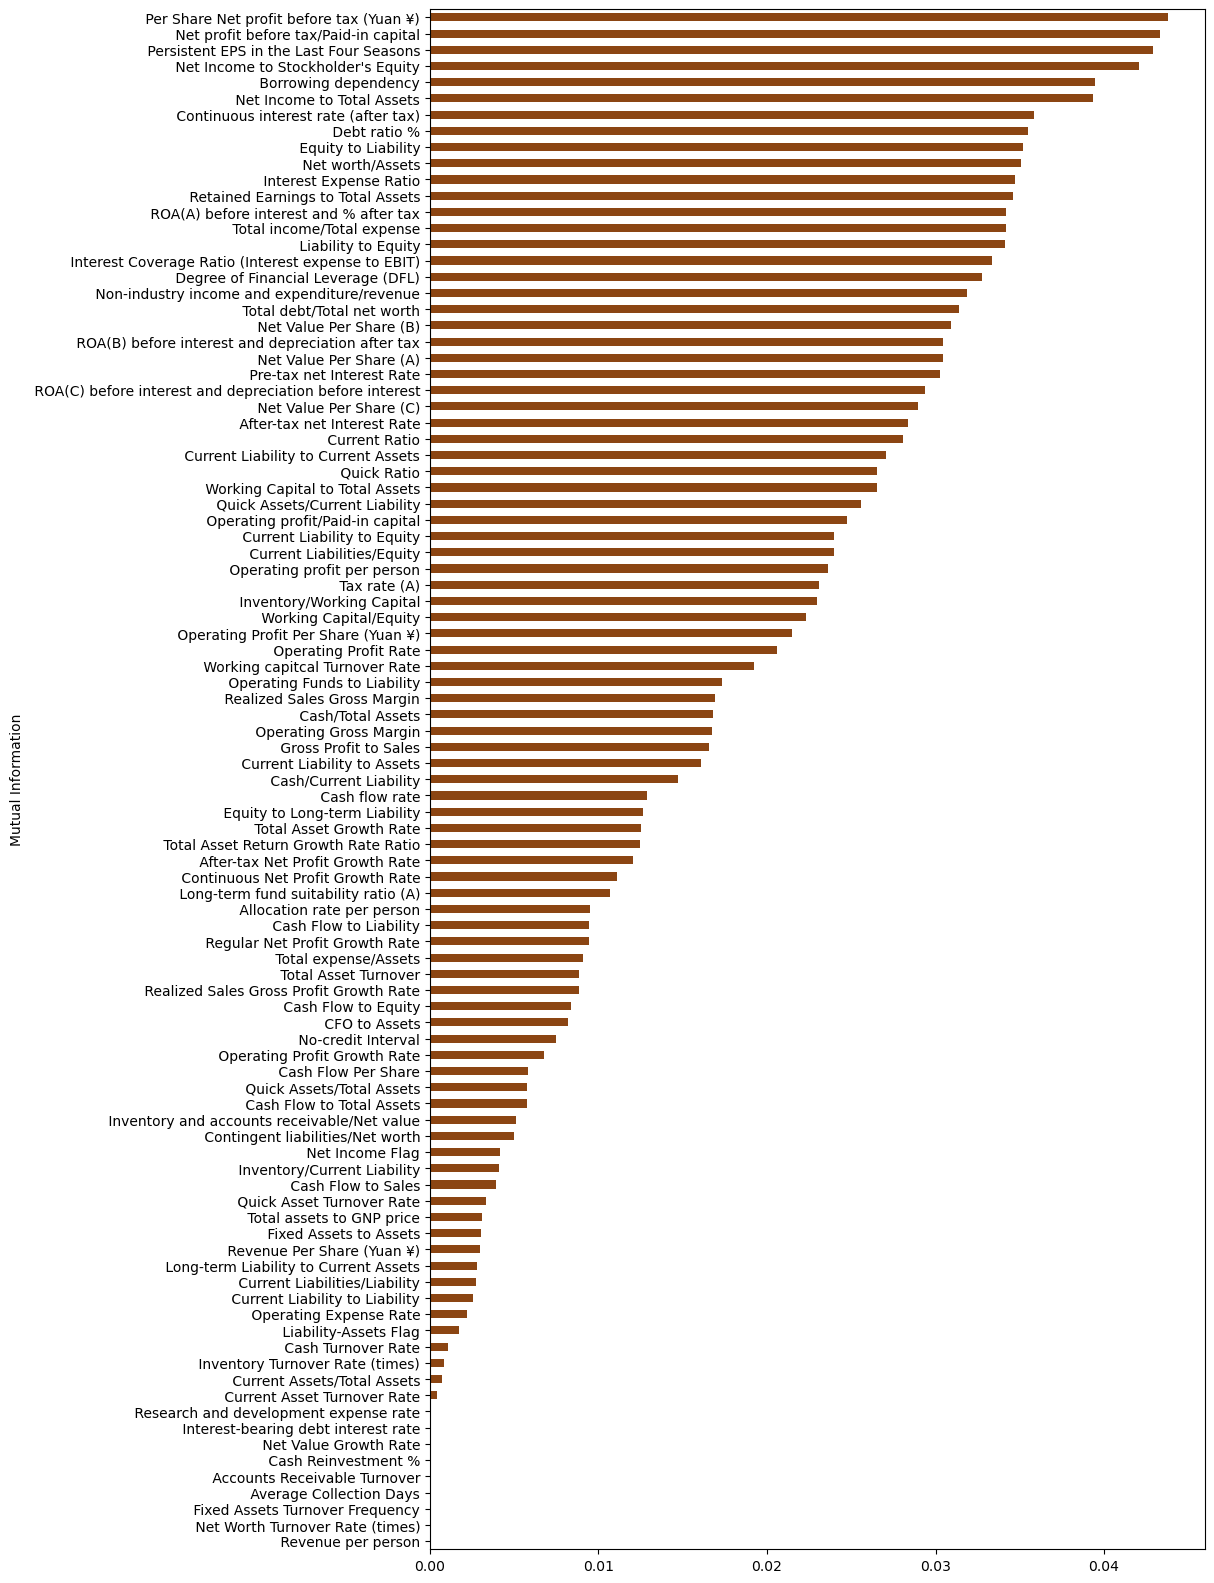

In [17]:
# 1) let's capture the above array in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on their mutual information value
# 4) and make a var plot

mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=True).plot.barh(figsize=(10, 20), color = '#8B4513')
plt.ylabel('Mutual Information')

**Nhận xét:**
+ Thứ tự các feature có ảnh hưởng đến **Bankrupt** được sort từ cao đến thấp.
+ 10 features có tác động lớn gồm:
    + Continuous interest rate (after tax),
    + Persistent EPS in the Last Four Seasons
    + Per Share Net profit before tax (Yuan ¥)
    + Debt ratio %
    + Net worth/Assets
    + Borrowing dependency
    + Net profit before tax/Paid-in capital
    + Net Income to Total Assets
    + Net Income to Stockholder's Equity
    + Equity to Liability
    + ...

### Select top k features based on MI

In [18]:
# here we will select the top 10 features
# based on their mutual information value

# select features
top_features = SelectKBest(mutual_info_classif, k=10) # k = 10
sel_ = top_features.fit(X_train, y_train) 

# display features
X_train.columns[sel_.get_support()]

Index([' Continuous interest rate (after tax)',
       ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)', ' Debt ratio %',
       ' Net worth/Assets', ' Borrowing dependency',
       ' Net profit before tax/Paid-in capital', ' Net Income to Total Assets',
       ' Net Income to Stockholder's Equity', ' Equity to Liability'],
      dtype='object')

### Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 3.2 Data Visualization <a class="anchor" id="3.2"></a>

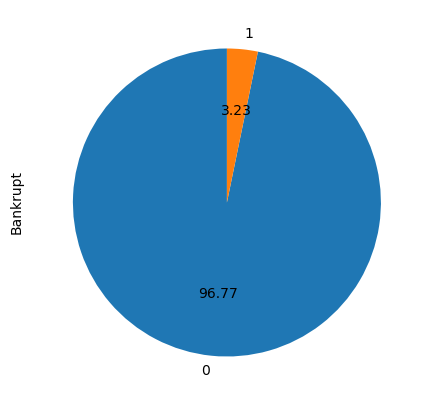

In [20]:
plt.figure(figsize=(5, 5))
data['Bankrupt'].value_counts().plot(kind='pie', autopct="%.2f", startangle = 90)
plt.show();

## 3.3 Imbalanced Data <a class="anchor" id="3.3"></a>

In [21]:
# Using SMOTE method to over sample the data
x, y = data.drop('Bankrupt',axis=1),data['Bankrupt']
x.shape, y.shape

((6819, 95), (6819,))

In [22]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x,y = smote.fit_resample(x,y)

In [23]:
x.shape,y.shape

((13198, 95), (13198,))

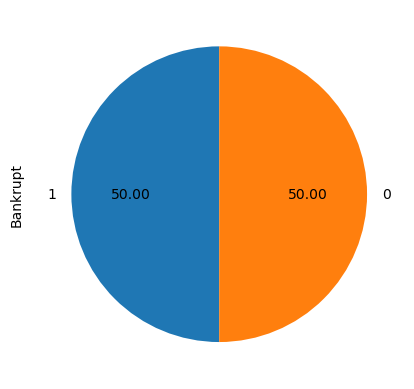

In [24]:
y.value_counts().plot(kind='pie',autopct="%.2f", startangle = 90)
plt.show()

**Nhận xét:** sau khi điều chỉnh, dữ liệu trở thành dạng Balance.

### 3.4 Splitting and training <a class="anchor" id="3.4"></a>

In [25]:
# split train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['Bankrupt'], axis=1),
    data['Bankrupt'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((4773, 95), (2046, 95))

In [26]:
# to remove the rest of the features:

X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

In [27]:
X_train.shape, X_test.shape

((4773, 10), (2046, 10))

# 4. Model Building <a class="anchor" id="4"></a>
[**Nội dung**](#0.1)

## 4.1 Logistic Regression <a class="anchor" id="4.1"></a>

In [28]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(random_state = 0)
LR_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [29]:
y_pred = LR_model.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [30]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc1}")

Accuracy score: 0.9721407624633431


## 4.2 Naive Bayes <a class="anchor" id="4.2"></a>

### Training the Naive Bayes on the Training set

In [31]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [32]:
from sklearn.metrics import confusion_matrix

y_pred = NB_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1923   64]
 [  27   32]]


In [33]:
acc2 = accuracy_score(y_test, y_pred)
print(f"Accuracy score : {acc2}")

Accuracy score : 0.955522971652004


## 4.3 KNN <a class="anchor" id="4.3"></a>

### Training the K-NN model on the Training set

In [34]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
y_pred = KNN_model.predict(X_test)

### KNN confusion matrix

In [36]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1961   26]
 [  50    9]]


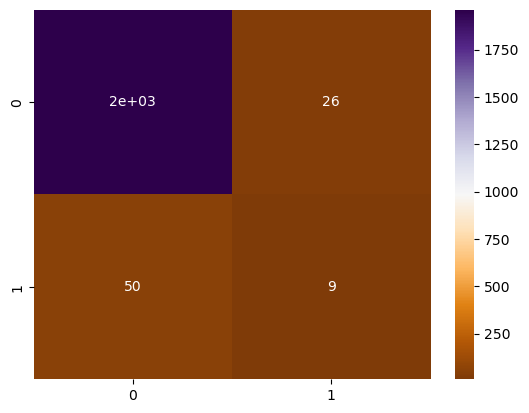

In [37]:
sns.heatmap(cm, annot=True, cmap='PuOr',)
plt.show()

In [38]:
acc3 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc3}")

Accuracy score: 0.9628543499511242


## 4.4 Decision Tree <a class="anchor" id="4.4"></a>

### Training Decision Tree Classification on Train set

In [39]:
from sklearn.tree import DecisionTreeClassifier
DTR_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTR_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [40]:
y_pred = DTR_model.predict(X_test)
acc4 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc4}")

Accuracy score: 0.947702834799609


## 4.5 Random Forest <a class="anchor" id="4.5"></a>

### Training the Random Forest Classification model on the Training set

In [41]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RF_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [42]:
y_pred = RF_model.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc5 = accuracy_score(y_test, y_pred)

[[1973   14]
 [  50    9]]


In [43]:
print(f"Random Forest Classification accuracy: {acc5}")

Random Forest Classification accuracy: 0.9687194525904204


## 4.6 SVM <a class="anchor" id="4.6"></a>

In [44]:
from sklearn.svm import SVC
SVM_model = SVC(kernel = 'linear', random_state = 0, probability=True)
SVM_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=0)

### Predict the test set result of SVM

In [45]:
y_pred = SVM_model.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1987    0]
 [  59    0]]


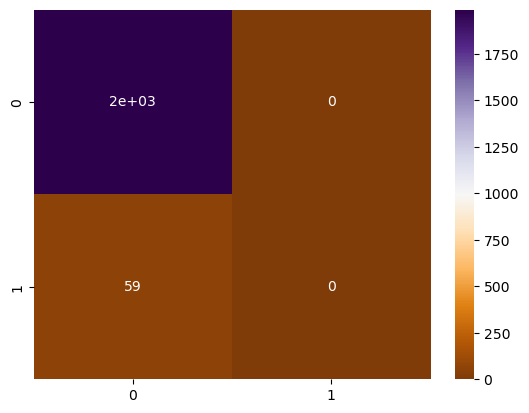

In [46]:
sns.heatmap(cm, annot=True, cmap='PuOr',)
plt.show()

In [47]:
acc6 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc6}")

Accuracy score: 0.9711632453567938


## 4.7 XGBoost <a class="anchor" id="4.7"></a>

In [48]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier()
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

### XG Boost Classifier confusion matrix

In [49]:
y_pred = XGB_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc7 = accuracy_score(y_test, y_pred)

[[1968   19]
 [  48   11]]


In [50]:
print("XG Boost classifier Acc: %0.4f" % acc7)

XG Boost classifier Acc: 0.9673


## 4.8 CatBoost <a class="anchor" id="4.8"></a>

### Training CatBoost on the Training set

In [51]:
from catboost import CatBoostClassifier
catboost_model = CatBoostClassifier()
catboost_model.fit(X_train, y_train)

Learning rate set to 0.020081
0:	learn: 0.6496940	total: 64.6ms	remaining: 1m 4s
1:	learn: 0.6044917	total: 66.4ms	remaining: 33.2s
2:	learn: 0.5622949	total: 68.2ms	remaining: 22.7s
3:	learn: 0.5240697	total: 69.8ms	remaining: 17.4s
4:	learn: 0.4912042	total: 71.3ms	remaining: 14.2s
5:	learn: 0.4607658	total: 72.5ms	remaining: 12s
6:	learn: 0.4335125	total: 73.7ms	remaining: 10.5s
7:	learn: 0.4062433	total: 75.2ms	remaining: 9.32s
8:	learn: 0.3815688	total: 77ms	remaining: 8.48s
9:	learn: 0.3606458	total: 78.8ms	remaining: 7.8s
10:	learn: 0.3419576	total: 80.2ms	remaining: 7.21s
11:	learn: 0.3231987	total: 82ms	remaining: 6.75s
12:	learn: 0.3048751	total: 83.8ms	remaining: 6.36s
13:	learn: 0.2898899	total: 85.5ms	remaining: 6.02s
14:	learn: 0.2752150	total: 87.3ms	remaining: 5.73s
15:	learn: 0.2622368	total: 89ms	remaining: 5.47s
16:	learn: 0.2507579	total: 90.9ms	remaining: 5.25s
17:	learn: 0.2385694	total: 93.1ms	remaining: 5.08s
18:	learn: 0.2290020	total: 95ms	remaining: 4.91s
19:

194:	learn: 0.0712847	total: 498ms	remaining: 2.06s
195:	learn: 0.0711967	total: 501ms	remaining: 2.06s
196:	learn: 0.0710838	total: 504ms	remaining: 2.06s
197:	learn: 0.0709897	total: 506ms	remaining: 2.05s
198:	learn: 0.0709258	total: 508ms	remaining: 2.04s
199:	learn: 0.0708120	total: 510ms	remaining: 2.04s
200:	learn: 0.0707587	total: 512ms	remaining: 2.03s
201:	learn: 0.0706778	total: 514ms	remaining: 2.03s
202:	learn: 0.0705266	total: 516ms	remaining: 2.02s
203:	learn: 0.0704490	total: 518ms	remaining: 2.02s
204:	learn: 0.0703729	total: 520ms	remaining: 2.02s
205:	learn: 0.0702835	total: 522ms	remaining: 2.01s
206:	learn: 0.0701397	total: 524ms	remaining: 2.01s
207:	learn: 0.0700627	total: 525ms	remaining: 2s
208:	learn: 0.0699797	total: 527ms	remaining: 2s
209:	learn: 0.0699375	total: 529ms	remaining: 1.99s
210:	learn: 0.0698505	total: 531ms	remaining: 1.99s
211:	learn: 0.0697579	total: 533ms	remaining: 1.98s
212:	learn: 0.0696753	total: 535ms	remaining: 1.98s
213:	learn: 0.0695

391:	learn: 0.0577151	total: 894ms	remaining: 1.39s
392:	learn: 0.0576428	total: 896ms	remaining: 1.38s
393:	learn: 0.0576386	total: 898ms	remaining: 1.38s
394:	learn: 0.0575936	total: 900ms	remaining: 1.38s
395:	learn: 0.0575599	total: 903ms	remaining: 1.38s
396:	learn: 0.0575228	total: 905ms	remaining: 1.37s
397:	learn: 0.0574603	total: 907ms	remaining: 1.37s
398:	learn: 0.0574000	total: 908ms	remaining: 1.37s
399:	learn: 0.0573476	total: 909ms	remaining: 1.36s
400:	learn: 0.0572740	total: 911ms	remaining: 1.36s
401:	learn: 0.0571903	total: 912ms	remaining: 1.36s
402:	learn: 0.0571351	total: 913ms	remaining: 1.35s
403:	learn: 0.0571002	total: 916ms	remaining: 1.35s
404:	learn: 0.0570450	total: 918ms	remaining: 1.35s
405:	learn: 0.0569564	total: 919ms	remaining: 1.34s
406:	learn: 0.0568657	total: 921ms	remaining: 1.34s
407:	learn: 0.0568362	total: 923ms	remaining: 1.34s
408:	learn: 0.0567944	total: 925ms	remaining: 1.34s
409:	learn: 0.0567379	total: 927ms	remaining: 1.33s
410:	learn: 

600:	learn: 0.0467560	total: 1.29s	remaining: 857ms
601:	learn: 0.0467099	total: 1.29s	remaining: 855ms
602:	learn: 0.0466837	total: 1.29s	remaining: 852ms
603:	learn: 0.0466442	total: 1.29s	remaining: 850ms
604:	learn: 0.0466078	total: 1.3s	remaining: 847ms
605:	learn: 0.0465533	total: 1.3s	remaining: 845ms
606:	learn: 0.0465310	total: 1.3s	remaining: 843ms
607:	learn: 0.0464870	total: 1.3s	remaining: 840ms
608:	learn: 0.0463740	total: 1.3s	remaining: 838ms
609:	learn: 0.0462831	total: 1.31s	remaining: 836ms
610:	learn: 0.0462670	total: 1.31s	remaining: 834ms
611:	learn: 0.0462249	total: 1.31s	remaining: 831ms
612:	learn: 0.0461623	total: 1.31s	remaining: 829ms
613:	learn: 0.0461246	total: 1.31s	remaining: 827ms
614:	learn: 0.0460567	total: 1.32s	remaining: 824ms
615:	learn: 0.0460043	total: 1.32s	remaining: 822ms
616:	learn: 0.0459766	total: 1.32s	remaining: 820ms
617:	learn: 0.0459400	total: 1.32s	remaining: 817ms
618:	learn: 0.0458236	total: 1.32s	remaining: 815ms
619:	learn: 0.045

809:	learn: 0.0384504	total: 1.68s	remaining: 395ms
810:	learn: 0.0384449	total: 1.69s	remaining: 393ms
811:	learn: 0.0384393	total: 1.69s	remaining: 391ms
812:	learn: 0.0384050	total: 1.69s	remaining: 389ms
813:	learn: 0.0383679	total: 1.69s	remaining: 387ms
814:	learn: 0.0383455	total: 1.69s	remaining: 385ms
815:	learn: 0.0383135	total: 1.7s	remaining: 382ms
816:	learn: 0.0382977	total: 1.7s	remaining: 380ms
817:	learn: 0.0382606	total: 1.7s	remaining: 378ms
818:	learn: 0.0382092	total: 1.7s	remaining: 376ms
819:	learn: 0.0381901	total: 1.7s	remaining: 374ms
820:	learn: 0.0381403	total: 1.71s	remaining: 372ms
821:	learn: 0.0381257	total: 1.71s	remaining: 370ms
822:	learn: 0.0380806	total: 1.71s	remaining: 368ms
823:	learn: 0.0380633	total: 1.71s	remaining: 365ms
824:	learn: 0.0380288	total: 1.71s	remaining: 363ms
825:	learn: 0.0380150	total: 1.72s	remaining: 361ms
826:	learn: 0.0380064	total: 1.72s	remaining: 359ms
827:	learn: 0.0379917	total: 1.72s	remaining: 357ms
828:	learn: 0.037

991:	learn: 0.0336628	total: 2.08s	remaining: 16.8ms
992:	learn: 0.0336369	total: 2.08s	remaining: 14.7ms
993:	learn: 0.0335556	total: 2.08s	remaining: 12.6ms
994:	learn: 0.0335207	total: 2.09s	remaining: 10.5ms
995:	learn: 0.0335117	total: 2.09s	remaining: 8.39ms
996:	learn: 0.0334762	total: 2.09s	remaining: 6.29ms
997:	learn: 0.0334674	total: 2.09s	remaining: 4.2ms
998:	learn: 0.0334401	total: 2.1s	remaining: 2.1ms
999:	learn: 0.0334315	total: 2.1s	remaining: 0us


In [52]:
y_pred = catboost_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc8 = accuracy_score(y_test, y_pred)

[[1973   14]
 [  50    9]]


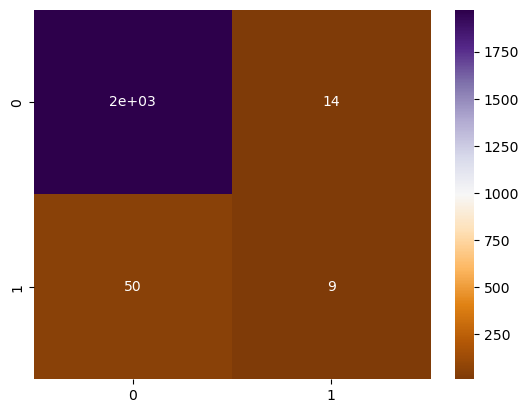

In [53]:
sns.heatmap(cm, annot=True, cmap='PuOr',)
plt.show()

In [54]:
print(acc8)

0.9687194525904204


## 4.9 ANN <a class="anchor" id="4.9"></a>

In [55]:
from tensorflow import keras
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

2023-01-28 01:53:18.677795: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [56]:
ANN_model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(10,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

ANN_model.compile(
    optimizer='adam',
    metrics=['accuracy'],
    loss='binary_crossentropy'
)

2023-01-28 01:53:21.310374: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [57]:
ANN_model.fit(X_train, y_train, epochs=200)

Epoch 1/200
150/150 [==============================] - 0s 641us/step - loss: 0.2874 - accuracy: 0.9663
Epoch 2/200
150/150 [==============================] - 0s 563us/step - loss: 0.1522 - accuracy: 0.9663
Epoch 3/200
150/150 [==============================] - 0s 563us/step - loss: 0.1418 - accuracy: 0.9663
Epoch 4/200
150/150 [==============================] - 0s 559us/step - loss: 0.1408 - accuracy: 0.9663
Epoch 5/200
150/150 [==============================] - 0s 565us/step - loss: 0.1399 - accuracy: 0.9663
Epoch 6/200
150/150 [==============================] - 0s 577us/step - loss: 0.1391 - accuracy: 0.9663
Epoch 7/200
150/150 [==============================] - 0s 568us/step - loss: 0.1375 - accuracy: 0.9663
Epoch 8/200
150/150 [==============================] - 0s 564us/step - loss: 0.1360 - accuracy: 0.9663
Epoch 9/200
150/150 [==============================] - 0s 633us/step - loss: 0.1344 - accuracy: 0.9663
Epoch 10/200
150/150 [==============================] - 0s 574us/step - l

150/150 [==============================] - 0s 542us/step - loss: 0.1008 - accuracy: 0.9658
Epoch 80/200
150/150 [==============================] - 0s 577us/step - loss: 0.1005 - accuracy: 0.9661
Epoch 81/200
150/150 [==============================] - 0s 592us/step - loss: 0.1004 - accuracy: 0.9667
Epoch 82/200
150/150 [==============================] - 0s 568us/step - loss: 0.1002 - accuracy: 0.9665
Epoch 83/200
150/150 [==============================] - 0s 558us/step - loss: 0.1004 - accuracy: 0.9665
Epoch 84/200
150/150 [==============================] - 0s 669us/step - loss: 0.1001 - accuracy: 0.9669
Epoch 85/200
150/150 [==============================] - 0s 596us/step - loss: 0.1001 - accuracy: 0.9663
Epoch 86/200
150/150 [==============================] - 0s 595us/step - loss: 0.1002 - accuracy: 0.9667
Epoch 87/200
150/150 [==============================] - 0s 555us/step - loss: 0.1006 - accuracy: 0.9665
Epoch 88/200
150/150 [==============================] - 0s 538us/step - loss:

150/150 [==============================] - 0s 612us/step - loss: 0.0961 - accuracy: 0.9677
Epoch 158/200
150/150 [==============================] - 0s 610us/step - loss: 0.0958 - accuracy: 0.9671
Epoch 159/200
150/150 [==============================] - 0s 599us/step - loss: 0.0956 - accuracy: 0.9671
Epoch 160/200
150/150 [==============================] - 0s 586us/step - loss: 0.0957 - accuracy: 0.9677
Epoch 161/200
150/150 [==============================] - 0s 584us/step - loss: 0.0959 - accuracy: 0.9677
Epoch 162/200
150/150 [==============================] - 0s 605us/step - loss: 0.0959 - accuracy: 0.9677
Epoch 163/200
150/150 [==============================] - 0s 627us/step - loss: 0.0960 - accuracy: 0.9671
Epoch 164/200
150/150 [==============================] - 0s 599us/step - loss: 0.0957 - accuracy: 0.9677
Epoch 165/200
150/150 [==============================] - 0s 656us/step - loss: 0.0955 - accuracy: 0.9677
Epoch 166/200
150/150 [==============================] - 0s 577us/ste

### Predictions

In [58]:
def predict(model,x):
    pred  = ANN_model.predict(x)
    pred[pred >= 0.5] = 1
    pred[pred < 0.5] = 0
    return pred

def predict_graph(y_true,y_pred,title):
    cm = confusion_matrix(y_true,y_pred)
    plt.figure(figsize=(7,7))
#     cmap = sns.color_palette("viridis", as_cmap=True)
    sns.heatmap(cm,annot=True,fmt='g',cmap='PuOr',
                xticklabels=['No Bankruptcy','Bankruptcy'], yticklabels=['No Bankruptcy','Bankruptcy'])
    plt.title(title)
    plt.show()
    
    print("\n")
    print("Classification Report:")
    print(classification_report(y_true,y_pred))

### Train Predictions

150/150 [==============================] - 0s 431us/step


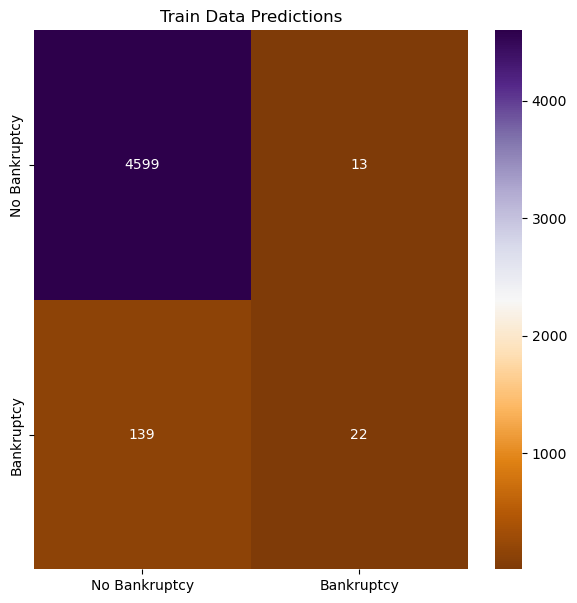



Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4612
           1       0.63      0.14      0.22       161

    accuracy                           0.97      4773
   macro avg       0.80      0.57      0.60      4773
weighted avg       0.96      0.97      0.96      4773



In [59]:
y_train_pred = predict(ANN_model, X_train)
predict_graph(y_train, y_train_pred, 'Train Data Predictions')

In [60]:
acc9 = accuracy_score(y_test, y_pred)
print("Accuracy score: ", acc9)

Accuracy score:  0.9687194525904204


64/64 [==============================] - 0s 440us/step


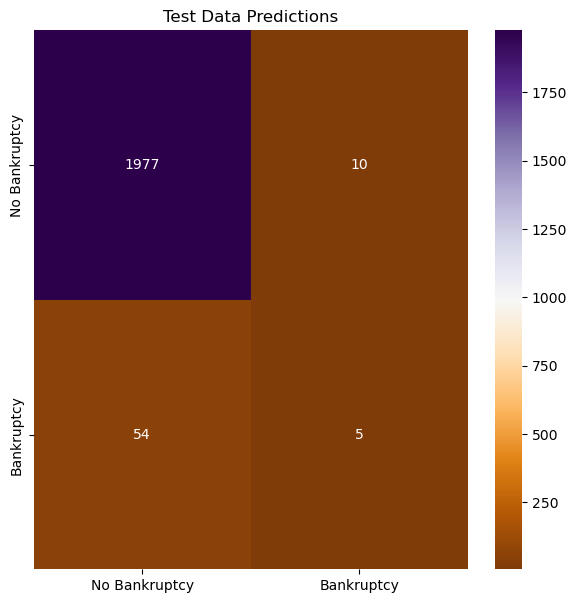



Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1987
           1       0.33      0.08      0.14        59

    accuracy                           0.97      2046
   macro avg       0.65      0.54      0.56      2046
weighted avg       0.95      0.97      0.96      2046



In [61]:
# Test Predictions
y_test_pred = predict(ANN_model,X_test)
predict_graph(y_test, y_test_pred,'Test Data Predictions')

# 5. Result <a class="anchor" id="5"></a>
[**Nội dung**](#0.1)

### Compare the accuracy of the models on the training set

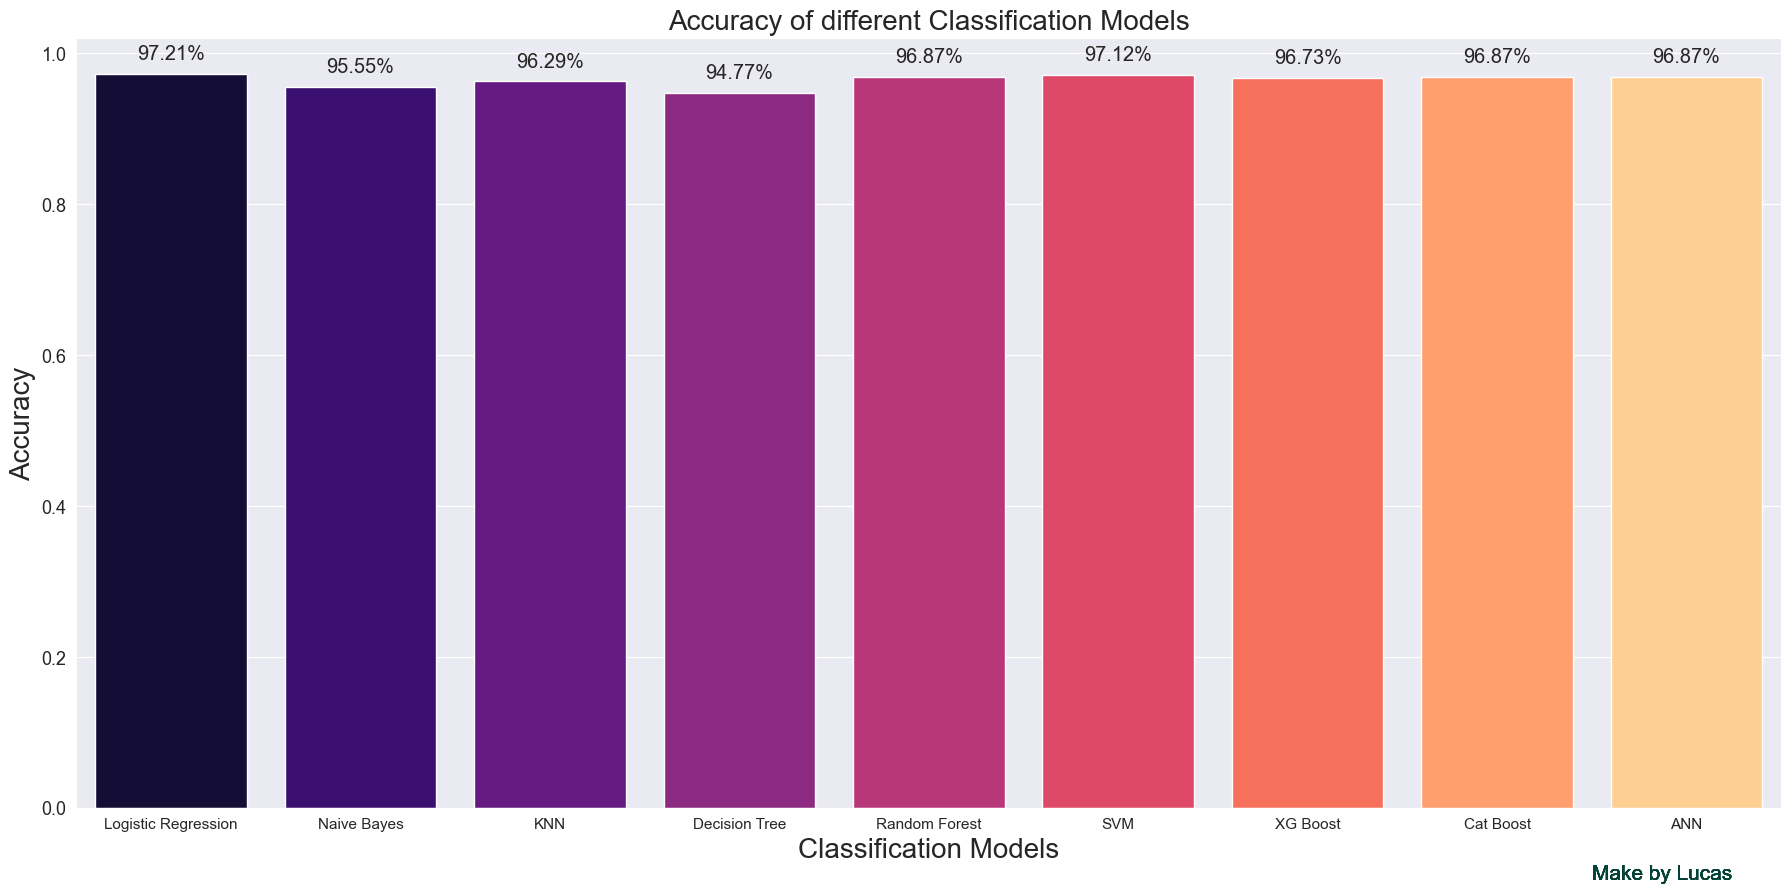

In [62]:
mylist=[]
mylist2=[]

mylist.append(acc1)
mylist2.append("Logistic Regression")
mylist.append(acc2)
mylist2.append("Naive Bayes")
mylist.append(acc3)
mylist2.append("KNN")
mylist.append(acc4)
mylist2.append("Decision Tree")
mylist.append(acc5)
mylist2.append("Random Forest")
mylist.append(acc6)
mylist2.append("SVM")
mylist.append(acc7)
mylist2.append("XG Boost")
mylist.append(acc8)
mylist2.append("Cat Boost")
mylist.append(acc9)
mylist2.append("ANN")

plt.figure(figsize=(22, 10))
sns.set_style("darkgrid")
ax = sns.barplot(x = mylist2, y = mylist, palette = "magma", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')

    # Add Text watermark
    plt.text(7.5, -0.1, 'Make by Lucas', fontsize = 15,
             color ='#034235', ha ='left', va ='bottom',
             alpha = 0.7)
       
plt.show();

# palette = 'Greens_d'

**Nhận xét:**
+ Các mô hình đều có Accuracy rất cao, đều trên 95%.
+ Tuy nhiên, mô hình có Accuracy **cao nhất** là **Logistic Regression**.
+ Do đó, ta lựa chọn mô hình này để tiến hành dự báo.

### ROC Curve and Area Under the Curve

In [63]:
from sklearn.metrics import roc_curve, auc

**ROC - Logistic Regression**

In [64]:
y_pred_logistic = LR_model.predict_proba(X_test)[:,1]
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

**ROC - Naive Bayes**

In [65]:
y_pred_nb = NB_model.predict_proba(X_test)[:,1]
nb_fpr, nb_tpr, threshold = roc_curve(y_test, y_pred_nb)
auc_nb = auc(nb_fpr, nb_tpr)

**ROC - KNN**

In [66]:
y_pred_knn = KNN_model.predict_proba(X_test)[:,1]
knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_knn)
auc_knn = auc(knn_fpr, knn_tpr)

**ROC - Decision Tree**

In [67]:
y_pred_dtr = DTR_model.predict_proba(X_test)[:,1]
dtr_fpr, dtr_tpr, threshold = roc_curve(y_test, y_pred_dtr)
auc_dtr = auc(dtr_fpr, dtr_tpr)

**ROC - Random Forest**

In [68]:
y_pred_rfc = RF_model.predict_proba(X_test)[:,1]
rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, y_pred_rfc)
auc_rfc = auc(rfc_fpr, rfc_tpr)

**ROC - SVM**

In [69]:
y_pred_svm = SVM_model.predict_proba(X_test)[:,1]
svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

**ROC - XG Boost**

In [70]:
y_pred_xgb = XGB_model.predict_proba(X_test)[:,1]
xgb_fpr, xgb_tpr, threshold = roc_curve(y_test, y_pred_xgb)
auc_xgb = auc(xgb_fpr, xgb_tpr)

**ROC - CatBoost**

In [71]:
y_pred_catboost = catboost_model.predict_proba(X_test)[:,1]
catboost_fpr, catboost_tpr, threshold = roc_curve(y_test, y_pred_catboost)
auc_catboost = auc(catboost_fpr, catboost_tpr)

**ROC - ANN**

In [72]:
y_pred_ann = ANN_model.predict(X_test)
ann_fpr, ann_tpr, threshold = roc_curve(y_test, y_pred_ann)
auc_ann = auc(ann_fpr, ann_tpr)

64/64 [==============================] - 0s 520us/step


**ROC - Plotting Graph**

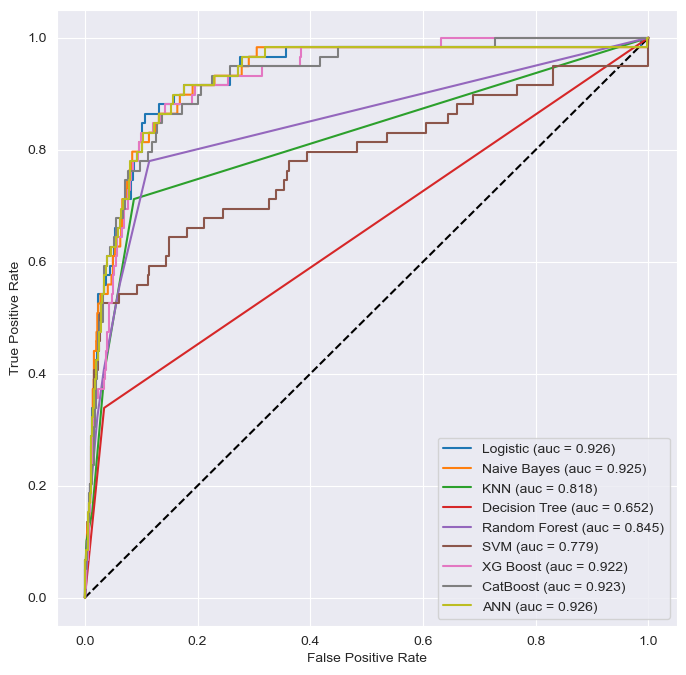

In [73]:
plt.figure(figsize=(8, 8), dpi=100)
plt.plot([0, 1], [0, 1], 'k--')
# Logistic Regression
plt.plot(logistic_fpr, logistic_tpr, label='Logistic (auc = %0.3f)' % auc_logistic)
# Naive Bayes
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (auc = %0.3f)' % auc_nb)
# KNN
plt.plot(knn_fpr, knn_tpr, label='KNN (auc = %0.3f)' % auc_knn)
# Decision Tree
plt.plot(dtr_fpr, dtr_tpr, label='Decision Tree (auc = %0.3f)' % auc_dtr)
# Random Forest
plt.plot(rfc_fpr, rfc_tpr, label='Random Forest (auc = %0.3f)' % auc_rfc)
# SVM
plt.plot(svm_fpr, svm_tpr, label='SVM (auc = %0.3f)' % auc_svm)
# XGBoost
plt.plot(xgb_fpr, xgb_tpr, label='XG Boost (auc = %0.3f)' % auc_xgb)
# CatBoost
plt.plot(catboost_fpr, catboost_tpr, linestyle='-', label='CatBoost (auc = %0.3f)' % auc_catboost)
# ANN
plt.plot(ann_fpr, ann_tpr, label='ANN (auc = %0.3f)' % auc_ann)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.show();

# 6. Conclusions <a class="anchor" id="6"></a>
[**Nội dung**](#0.1)

Dự báo về vỡ nợ của công ty được sử dụng trong các lĩnh vực khác nhau trên toàn nền kinh tế. Các tập đoàn có thể chẩn đoán tình trạng hiện tại của họ dựa trên các mô hình dự đoán và thiết lập các chiến lược của họ. Các nhà điều hành có thể điều hành doanh nghiệp của họ ổn định hơn bằng cách quản lý các chỉ số chính ảnh hưởng đến rủi ro vỡ nợ của công ty. Các nhà đầu tư có thể sửa đổi chiến lược của họ và cải thiện danh mục đầu tư của họ bằng cách kiểm tra khả năng vỡ nợ của công ty. Ngoài ra, các chính phủ có thể thiết lập các chính sách an toàn vĩ mô và cải thiện các quy định tài chính liên quan bằng cách sử dụng các dự đoán vỡ nợ của công ty. Theo những cách này, các mô hình dự đoán vỡ nợ giúp thiết kế và cải thiện hệ thống tài chính. Ngoài ra, bằng cách sử dụng các thuật toán học máy và mô hình thống kê, các dự đoán vỡ nợ của công ty là ưu tiên hàng đầu của kỹ thuật tài chính tiên tiến. Cuộc khủng hoảng tài chính toàn cầu gần đây và sự gia tăng rủi ro tín dụng càng làm nổi bật tầm quan trọng của lĩnh vực này. Do tầm quan trọng của chúng, các dự đoán vỡ nợ của công ty đã được nghiên cứu rộng rãi.

Trong bài phân tích này, một số kết quả quan trọng được tìm thấy như sau:
+ Đề tài sử dụng các mô hình Machine Learning để đưa ra mô hình tốt nhất cho dự báo phá sản tại các công ty.
+ Mô hình tốt nhất đưa ra là **Logistic Regression Model**. Mặc dù ANN có accuracy có độ chính xác rất cao (auc = 92.7%). Tuy nhiên, ANN model tốn thời gian thực hiện và chạy model hơn, do đó, Logistic Regression là lựa chọn tối ưu nhất được đề xuất.
+ Độ chính xác của mô hình xây dựng được là **92.7 %**.
+ Ngoài ra, **top 10 features** có tác động lớn đến Bankruptcy gồm:
    + Continuous interest rate (after tax),
    + Persistent EPS in the Last Four Seasons
    + Per Share Net profit before tax (Yuan ¥)
    + Debt ratio %
    + Net worth/Assets
    + Borrowing dependency
    + Net profit before tax/Paid-in capital
    + Net Income to Total Assets
    + Net Income to Stockholder's Equity
    + Equity to Liability
    
Tóm lại, việc xây dựng mô hình để dự đoán rủi ro vỡ nợ (hay rủi ro phá sản) là rất quan trọng đối với mỗi doanh nghiệp. Do đó, khi thực hiện dự báo vỡ nợ doanh nghiệp, cần lựa chọn một phương pháp phù hợp để có thể cung cấp thông tin phù hợp cho mục đích dự báo, đòi hỏi phải hiểu cặn kẽ về cách sử dụng phù hợp của từng phương pháp.

**Hướng mở trong tương lai, có thể kết hợp thêm các model Machine Learning khác như `Gradient Boosted Tree`, `AdaBoost`, `Light GBM` để đưa ra model với độ chính xác cao hơn.**

**<span style="color:#034235;"> Thanks for reading this post. </span>**

_______
_Make by_**<span style="color:#034235;"> Lucas,</span>**
### <p style="background-color:#034235;font-family:newtimeroman;color:#ffe7a0;font-size:150%;text-align:center;border-radius:10px 10px;">END</p>
______
<img src="https://github.com/LeHongNgoc3820/Lucas_viet_Blog/blob/b5e2de5a812292889e793b719572d06f3ababf2d/Logo%20ta%CC%81ch%20ne%CC%82%CC%80n.png?raw=true"
     style="width:200px;height:200px;">

**<span style="color:#034235;"> You can contact with me on:</span>**
+ **Gmail**: lehongngoc.work@gmail.com
+ **GitHub**: [LeHongNgoc3820](https://github.com/LeHongNgoc3820)
+ **Linkedln**: [Ngoc Le Hong](https://www.linkedin.com/in/ngoc-le-hong-44131b21a/)